

Mengunduh dataset dari DICODING https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip



In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-26 06:55:06--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.24MB/s    in 4m 18s  

2021-05-26 06:59:25 (1.19 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Melakukan ekstraksi pada file zip

In [ ]:
import os #Import modul untuk mengakses file
import zipfile #Import modul untuk membaca file

local_zip = '/content/rockpaperscissors.zip' #Mendefinnisikan file yang akan diekstrak
zip_ref = zipfile.ZipFile(local_zip, 'r') #Ekstrak file zip
zip_ref.extractall('/content') #Menempatkan file hasil ekstrak
zip_ref.close() #Menghentikan fungsi zip

Menyiapkan folder

In [ ]:
import os #Import modul untuk mengakses file

#Mendefinisikan folter training gunting, batu dan kertas
base_dir = '/content/rockpaperscissors' 
scissors_dir = os.path.join(base_dir, 'scissors') 
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')

#Menampilkan jumlah gambar gunting, batu dan kertas
print('Jumlah gambar gunting :', len(os.listdir(scissors_dir)))
print('Jumlah gambar gunting :', len(os.listdir(rock_dir)))
print('Jumlah gambar gunting :', len(os.listdir(paper_dir)))

Jumlah gambar gunting : 750
Jumlah gambar gunting : 726
Jumlah gambar gunting : 712


Menggunakan Image Generator

In [ ]:
import tensorflow as tf #Import modul tensor flow
import keras_preprocessing #Import modul keras
from keras_preprocessing import image #Import keras_preprocessing untuk gambar
from keras_preprocessing.image import ImageDataGenerator #Import keras_preprocessing.image untuk ImageDataGenerator

Memisahkan data training dan validation

In [ ]:
BASIS_DIR = '/content/rockpaperscissors/rps-cv-images/' #Menyiapkan folfer
train_datagen = ImageDataGenerator( #ImageDataGenerator
                    rescale=1./255, #Normalisasi data
                    rotation_range=40, #Rotasi gambar hingga 40 derajat
                    horizontal_flip=True, #Putar balik gambar secara horizontal
                    shear_range = 0.2, #Prmangkasan gambar sebanyak 0.2 dari gambar asli
                    fill_mode = 'nearest', #Mengisi pixel yang kosong
                    validation_split = 0.4 #Membagi data training 60% dan 40% data validation
                    )


Pelabelan data menggunakan ImageDataGenerator

In [ ]:
train_generator = train_datagen.flow_from_directory(
        BASIS_DIR,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        shuffle = True,
        # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'binary'
        class_mode='categorical',
        subset = 'training') #Untuk data training

validation_generator = train_datagen.flow_from_directory(
        BASIS_DIR, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        shuffle = True, 
        # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode = 'categorical',
        subset = 'validation') #Untuk data validation

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Membangun model jaringan saraf dengan model squential

In [ ]:
model = tf.keras.models.Sequential([ #Model Squential                                
    #Bentuk input gambar dengan ukuran 150x150 dengan 3 byte
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)), #Konvolusi pertama
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), #Konvolusi kedua
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'), #Konvolusi ketiga
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(), #Layer input untuk Deep Learning
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(128, activation='relu'), #Hidden layer pertama
    tf.keras.layers.Dense(512, activation='relu'), #Hidden layer kedua
    tf.keras.layers.Dense(3, activation='softmax') #Layer output
])

model.summary() #Menampiljan summary model

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9248)             

Kompilasi model

In [ ]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='categorical_crossentropy', #Melakukan klasifikasi lebih dari 2 karena kategorikal
              optimizer=tf.optimizers.Adam(), #Optimizer
              metrics=['accuracy'] #Akurasi model training
              )

Melatih model saraf tiruan

In [ ]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=4,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=50, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=4,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/50
4/4 - 6s - loss: 1.1023 - accuracy: 0.3750 - val_loss: 1.0892 - val_accuracy: 0.5859
Epoch 2/50
4/4 - 5s - loss: 1.0875 - accuracy: 0.3750 - val_loss: 1.0690 - val_accuracy: 0.3906
Epoch 3/50
4/4 - 5s - loss: 1.0766 - accuracy: 0.3672 - val_loss: 1.0545 - val_accuracy: 0.3672
Epoch 4/50
4/4 - 5s - loss: 1.0416 - accuracy: 0.4453 - val_loss: 1.0326 - val_accuracy: 0.3984
Epoch 5/50
4/4 - 5s - loss: 1.0347 - accuracy: 0.5078 - val_loss: 0.9374 - val_accuracy: 0.6016
Epoch 6/50
4/4 - 4s - loss: 1.0706 - accuracy: 0.4592 - val_loss: 1.0516 - val_accuracy: 0.4297
Epoch 7/50
4/4 - 4s - loss: 0.9520 - accuracy: 0.5816 - val_loss: 1.0042 - val_accuracy: 0.4922
Epoch 8/50
4/4 - 5s - loss: 0.9127 - accuracy: 0.5938 - val_loss: 0.9672 - val_accuracy: 0.5000
Epoch 9/50
4/4 - 4s - loss: 0.9373 - accuracy: 0.6429 - val_loss: 0.8528 - val_accuracy: 0.7109
Epoch 10/50
4/4 - 5s - loss: 0.8954 - accuracy: 0.6328 - val_loss: 0.8716 - val_accuracy: 0.6484
Epoch 11/50
4/4 - 5s - loss: 0.8107 - a

Saving 0Uomd0HvOB33m47I.png to 0Uomd0HvOB33m47I.png
0Uomd0HvOB33m47I.png
KERTAS


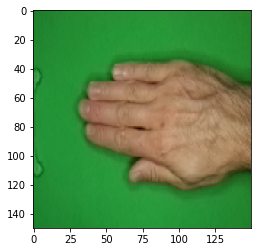

In [ ]:
import numpy as np #Import modul numpy
from google.colab import files #Import modul import file
from keras.preprocessing import image #Import modul keras _prepocessing untuk gambar
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload() #Upload gambar untuk dikenal model
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150)) #Mengubah ukuran menjadi 150x150
  imgplot = plt.imshow(img) #Menampilkan gambar yang diunggah
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('KERTAS') #Tampil Kertas
  elif classes[0][1]==1:
    print('BATU') #Tampil Batu
  elif classes[0][2]==1:
    print('GUNTING') #Tampil Gunting